*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


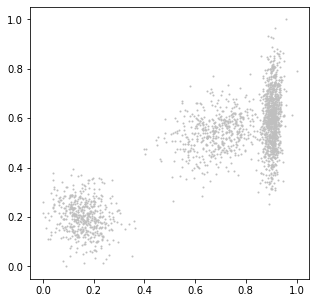

In [16]:
import numpy as np 
import numpy.matlib 
import matplotlib.pyplot as plt

# np.random.rand = uniform random generation, [0, 1]
# np.random.randn = normal random generation, N(0, 1)

# r = 2 x 2 matrix, 찌그러트린다
r1 = 10*(np.random.rand(2,2) - 0.5)
r2 = 10*(np.random.rand(2,2) - 0.5)
r3 = 10*(np.random.rand(2,2) - 0.5)

# t = 1 x 2 vector, 평균을 이동
t1 = 50*(np.random.rand(1,2) - 0.5)
t2 = 50*(np.random.rand(1,2) - 0.5)
t3 = 50*(np.random.rand(1,2) - 0.5)

X1 = np.random.randn(1000,2)
X1 = X1.dot(r1) + t1

X2 = np.random.randn(500,2)
X2 = X2.dot(r2) + t2

X3 = np.random.randn(500,2)
X3 = X3.dot(r3) + t3

# unlabel data
X = np.vstack([X1, X2, X3])
np.random.shuffle(X)

# normalization [0, 1] 사이로 분포
Xmin = np.min(X, axis = 0)
X = (X - Xmin)

Xmax = np.max(X, axis = 0)
X = X / Xmax

plt.figure(figsize = (5,5))
plt.scatter(X[:,0], X[:,1], s = 1, c = [0.75, 0.75, 0.75])

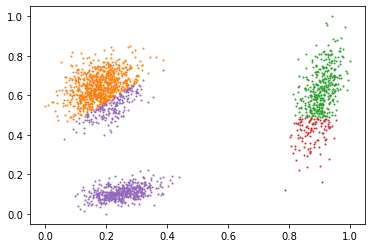

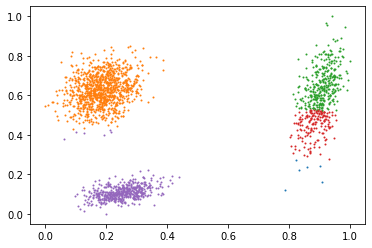

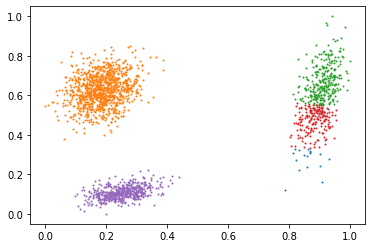

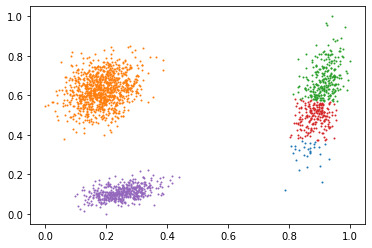

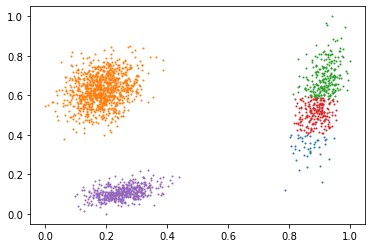

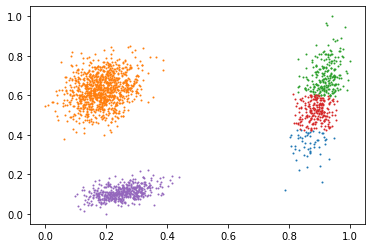

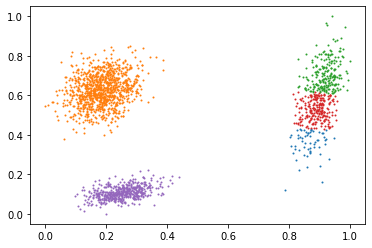

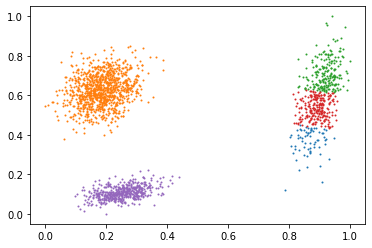

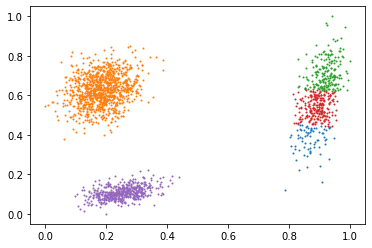

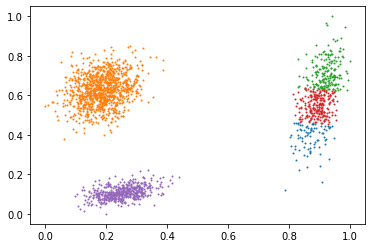

In [12]:
# k-means

# 전체 클러스터의 개수
K = 5
maxIter = 10

# 초기화
N,D = X.shape # N개의 sample, D차원
mu = np.random.rand(K, D)
# k번째 centroid = mu[k,:]

dist2 = np.zeros((N,K))
#dist2[n,k] = || x[n,:] - mu[k,:] ||**2

# iteration
for iteration in range(maxIter):

    # 주어진 sample, 주어진 centroid => 거리 => label
    for k in range(K):
        dist2[:,k] = np.sum( ( X - np.matlib.repmat( mu[k,:], N, 1) )**2, axis = 1)

    # 정수형 label
    c = np.argmin(dist2, axis = 1)

    # one-hot coding
    r = np.zeros((N,K), dtype = bool)
    r[np.arange(N), c] = 1

    # 주어진 sample, 주어진 label => centroid 갱신
    for k in range(K):
        mu[k,:] = np.mean(X[r[:,k],:], axis = 0)   
        # == np,mean(X[c == k, :], axis = 0)
        
    plt.figure()
    for k in range(0,K): 
        plt.scatter(X[r[:,k],0],X[r[:,k],1], s = 1)

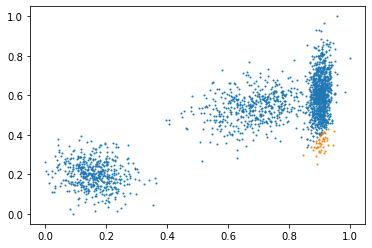

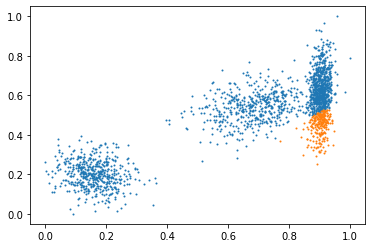

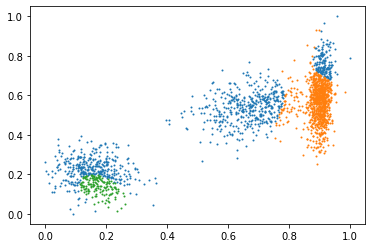

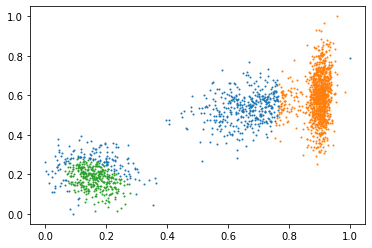

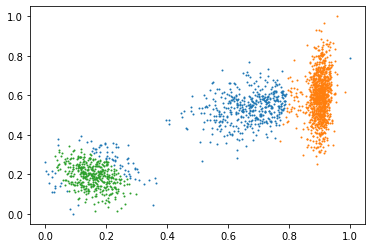

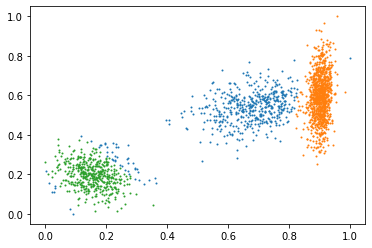

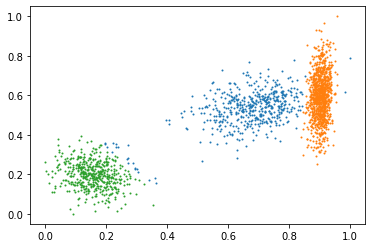

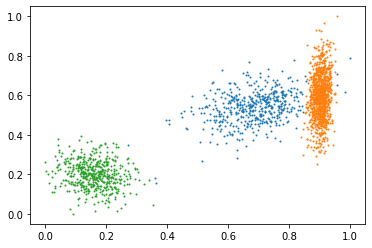

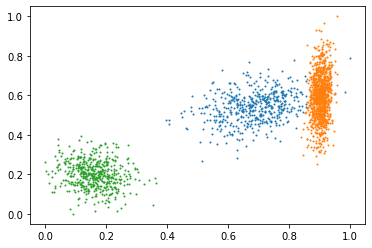

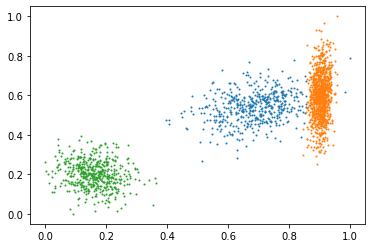

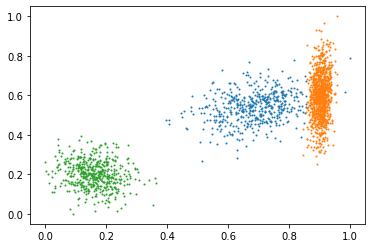

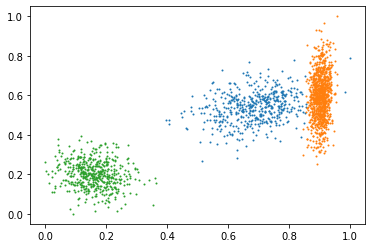

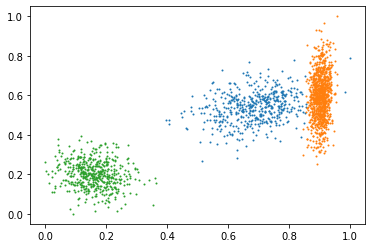

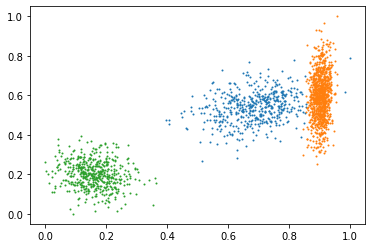

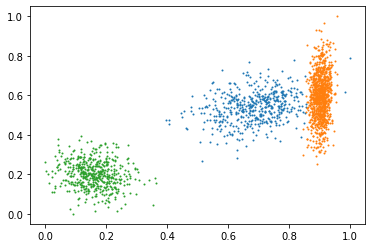

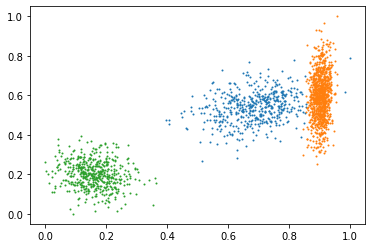

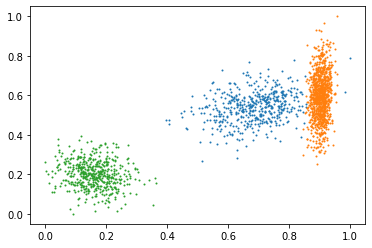

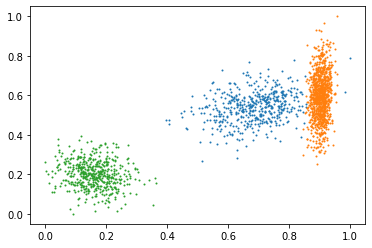

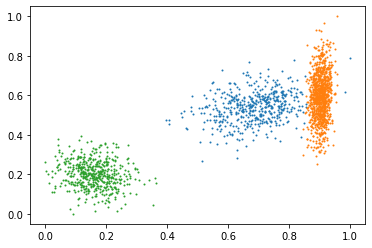

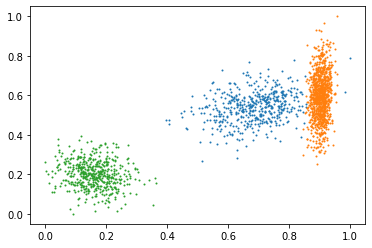

In [22]:
from scipy.stats import multivariate_normal

# 
K = 3
maxIter = 20

N,D = X.shape

# 파라미터 초기화
pi = np.random.rand(K)
pi = pi / np.sum(pi)
mu = np.random.rand(K,D) # mu[k,:] = k번째 cluster의 mean
sigma = np.zeros((D,D,K)) # sigma[:,:,k] = k번째 cluster의 covariance
for k in range(K):
    sigma[:,:,k] = 1e-2*np.identity(D) 
# iteration
for iteration in range(maxIter):
    # 주어진 sample, 주어진 param => responsibility
    gamma = np.zeros((N,K))  # gamma가 reponsibility
    for k in range(K):
        gamma[:,k] = pi[k]*multivariate_normal.pdf(X, mean = mu[k,:], cov = sigma[:,:,k])
    for n in range(N):
        gamma[n,:] = gamma[n,:] / np.sum(gamma[n,:])

    c = np.argmax(gamma, axis = 1)

    # 주어진 sample, 주어진 responsibility => param 업데이트
    Nk = np.zeros(K)   #
    mu = np.zeros((K,D))
    sigma = np.zeros((D,D,K))
    for k in range(K):
        Nk[k] = np.sum(gamma[:,k])
        pi[k] = Nk[k] / N

        for n in range(N):
            mu[k,:] += gamma[n,k] * X[n,:]
        mu[k,:] = mu[k,:] / Nk[k]

        for n in range(N):
            error = X[n,:] - mu[k,:]
            sigma[:,:,k] += gamma[n,k]*(error.reshape(D,1)).dot(error.reshape(1,D))        
        sigma[:,:,k] = sigma[:,:,k] / Nk[k]
    plt.figure()
    for k in range(K):
        plt.scatter(X[c == k,0],X[c == k,1],s = 1)

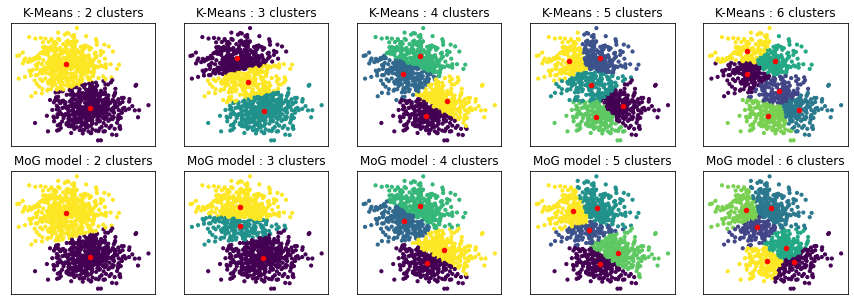

In [24]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Generate sample data
n_samples = 1000
random_state = 0

X, _ = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

n_clusters_list = [2, 3, 4, 5, 6]

# Algorithms to compare
clustering_algorithms = {
    "K-Means": KMeans,
    "MoG model" : GaussianMixture
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(15, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        
        if (algorithm_name == "K-Means"):
            algo = Algorithm(n_clusters=n_clusters, random_state=random_state)
        elif (algorithm_name == "MoG model"):
            algo = Algorithm(n_components=n_clusters, random_state=random_state)
            
        algo.fit(X)
        
        if (algorithm_name == "K-Means"):
            centers = algo.cluster_centers_    
            labels = algo.labels_
        elif (algorithm_name == "MoG model"):            
            centers = algo.means_   
            labels = algo.fit_predict(X)

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=labels)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

[0.2523675  0.49763453 0.24999797]
[[0.69163657 0.54288945]
 [0.90367968 0.59669948]
 [0.15919526 0.20127072]]
[[[ 0.00941077  0.00034179  0.00390928]
  [ 0.00234     0.00035069 -0.00066271]]

 [[ 0.00234     0.00035069 -0.00066271]
  [ 0.006111    0.01309032  0.00476255]]]
